# **Employee Attrition**

#### **Dataset Info:** Sample Data Set containing employee data who are resigned and stayed past 10 years

### 1. Import Libraries

In [43]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load the DataSet

In [44]:
emp_base_data = pd.read_csv("C:\\Users\\chary\\OneDrive\\Desktop\\Employee_Attrition-_Prediction_Model\\data\\employee data_raw.csv")
emp_base_data.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,NaN,2.0,High School,5.0,6750.0,33,32.0,22.0,2,0.0,14.0,66.0,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0.0,High School,5.0,7500.0,34,34.0,13.0,14,100.0,12.0,61.0,2,1.72,False
2,3,Finance,Male,55,Specialist,NaN,8.0,High School,3.0,5850.0,37,27.0,6.0,3,50.0,10.0,1.0,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7.0,Bachelor,2.0,4800.0,52,10.0,28.0,12,100.0,10.0,0.0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3.0,Bachelor,2.0,4800.0,38,NaN,29.0,13,100.0,15.0,9.0,1,1.25,False


In [45]:
print("Initial shape:", emp_base_data.shape)

Initial shape: (100000, 20)


In [46]:
emp_base_data.columns.values

array(['Employee_ID', 'Department', 'Gender', 'Age', 'Job_Title',
       'Hire_Date', 'Years_At_Company', 'Education_Level',
       'Performance_Score', 'Monthly_Salary', 'Work_Hours_Per_Week',
       'Projects_Handled', 'Overtime_Hours', 'Sick_Days',
       'Remote_Work_Frequency', 'Team_Size', 'Training_Hours',
       'Promotions', 'Employee_Satisfaction_Score', 'Resigned'],
      dtype=object)

In [47]:
# Checking the data types of all the columns
emp_base_data.dtypes

Employee_ID                      int64
Department                      object
Gender                          object
Age                              int64
Job_Title                       object
Hire_Date                       object
Years_At_Company               float64
Education_Level                 object
Performance_Score              float64
Monthly_Salary                 float64
Work_Hours_Per_Week              int64
Projects_Handled               float64
Overtime_Hours                 float64
Sick_Days                        int64
Remote_Work_Frequency          float64
Team_Size                      float64
Training_Hours                 float64
Promotions                       int64
Employee_Satisfaction_Score    float64
Resigned                        object
dtype: object

In [48]:
# Check the descriptive statistics of numeric variables
emp_base_data.describe()

,Employee_ID,Age,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
count,100000.000000,100000.000000,97614.000000,95745.000000,100000.000000,100000.000000,94629.000000,97603.000000,100000.000000,95970.000000,97670.000000,96130.000000,100000.000000,100000.000000
mean,50000.500000,41.029410,4.476243,2.995968,6403.211000,44.956950,24.441080,14.515087,7.008550,50.081015,10.010638,49.484958,0.999720,2.999088
std,28867.657797,11.244121,2.870143,1.414304,1372.508717,8.942003,14.457014,8.663223,4.331591,35.353865,5.497239,28.892029,0.815872,1.150719
min,1.000000,22.000000,0.000000,1.000000,3850.000000,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,25000.750000,31.000000,2.000000,2.000000,5250.000000,37.000000,12.000000,7.000000,3.000000,25.000000,5.000000,25.000000,0.000000,2.010000
50%,50000.500000,41.000000,4.000000,3.000000,6500.000000,45.000000,24.000000,15.000000,7.000000,50.000000,10.000000,49.000000,1.000000,3.000000
75%,75000.250000,51.000000,7.000000,4.000000,7500.000000,53.000000,37.000000,22.000000,11.000000,75.000000,15.000000,75.000000,2.000000,3.990000
max,100000.000000,60.000000,10.000000,5.000000,9000.000000,60.000000,49.000000,29.000000,14.000000,100.000000,19.000000,99.000000,2.000000,5.000000


### Observations:
- The average employee is **41 years old** (range 22–60).  
- Employees have worked **~5 years on average**, max 10 years.  
- Monthly salary ranges between **3,850 and 9,000**, with mean ~6,400.  
- Average work hours per week is **~45**, slightly above the standard 40-hour week.  
- Some variables (like Projects_Handled and Overtime_Hours) show high variability, indicating potential outliers.  




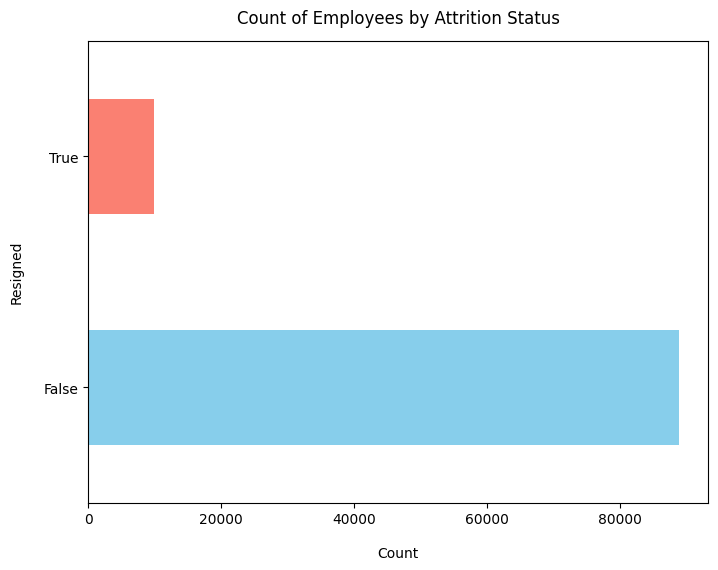

In [49]:
# Plot target distribution
emp_base_data['Resigned'].value_counts().plot(kind='barh', figsize=(8, 6), color=['skyblue', 'salmon'])
plt.xlabel("Count", labelpad=14)
plt.ylabel("Resigned", labelpad=14)
plt.title("Count of Employees by Attrition Status", y=1.02)
plt.show()

In [50]:
# Raw distribution of Resigned
attrition_counts = emp_base_data['Resigned'].value_counts()
print(attrition_counts)

Resigned
False    88812
True      9878
Name: count, dtype: int64


In [51]:
# Percentage distribution of Resigned

attrition_percentage = 100 * emp_base_data['Resigned'].value_counts() / len(emp_base_data['Resigned'])
print(attrition_percentage)

Resigned
False    88.812
True      9.878
Name: count, dtype: float64


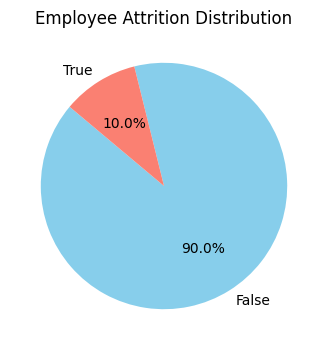

In [52]:
# Pie chart of target variable
plt.figure(figsize=(4, 4))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Employee Attrition Distribution')
plt.show()

  
The majority of employees did not resign, but a significant portion did. This imbalance should be considered during model training to avoid bias toward the majority class.


In [53]:
#  Concise summary of the dataset
emp_base_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    95871 non-null   object 
 6   Years_At_Company             97614 non-null   float64
 7   Education_Level              96878 non-null   object 
 8   Performance_Score            95745 non-null   float64
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             94629 non-null   float64
 12  Overtime_Hours               97603 non-null   float64
 13  

### Exploring missing values

In [54]:
missing_counts = emp_base_data.isnull().sum()
missing_counts

Employee_ID                       0
Department                        0
Gender                            0
Age                               0
Job_Title                         0
Hire_Date                      4129
Years_At_Company               2386
Education_Level                3122
Performance_Score              4255
Monthly_Salary                    0
Work_Hours_Per_Week               0
Projects_Handled               5371
Overtime_Hours                 2397
Sick_Days                         0
Remote_Work_Frequency          4030
Team_Size                      2330
Training_Hours                 3870
Promotions                        0
Employee_Satisfaction_Score       0
Resigned                       1310
dtype: int64

In [55]:
# Percentage of missing values
missing_percentage = (missing_counts / len(emp_base_data)) * 100

missing_summary = pd.DataFrame({
    "Missing Values": missing_counts,
    "Percentage (%)": missing_percentage
}).sort_values(by="Percentage (%)", ascending=False)

print(missing_summary)


                             Missing Values  Percentage (%)
Projects_Handled                       5371           5.371
Performance_Score                      4255           4.255
Hire_Date                              4129           4.129
Remote_Work_Frequency                  4030           4.030
Training_Hours                         3870           3.870
Education_Level                        3122           3.122
Overtime_Hours                         2397           2.397
Years_At_Company                       2386           2.386
Team_Size                              2330           2.330
Resigned                               1310           1.310
Department                                0           0.000
Employee_ID                               0           0.000
Age                                       0           0.000
Gender                                    0           0.000
Job_Title                                 0           0.000
Monthly_Salary                          

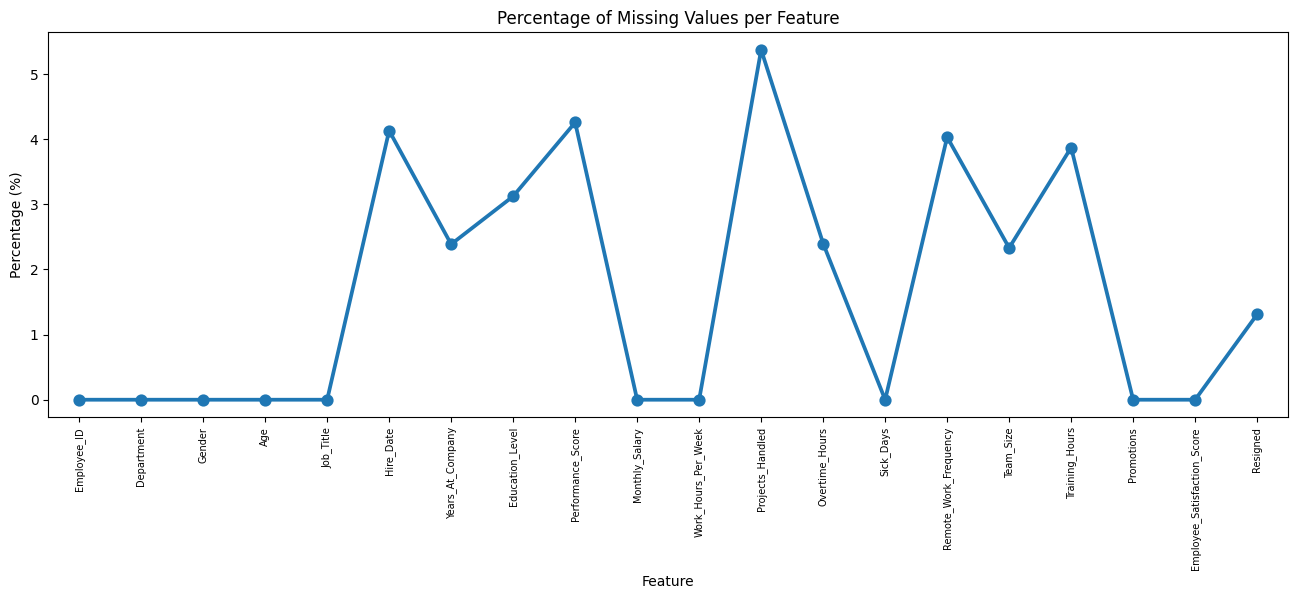

In [56]:
# Percentage of missing values
missing = pd.DataFrame((emp_base_data.isnull().sum()) * 100 / emp_base_data.shape[0]).reset_index()
missing.columns = ['Feature', 'Missing_Percentage']

plt.figure(figsize=(16,5))
ax = sns.pointplot(x='Feature', y='Missing_Percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values per Feature")
plt.ylabel("Percentage (%)")
plt.show()

Some features have significant missing values (Hire_Date, Years_At_Company, Education_Level, etc.).

The target variable Resigned also has some missing values → these rows must be dropped.

We will apply median imputation for numeric features and most frequent imputation for categorical features during preprocessing.

### Outliers

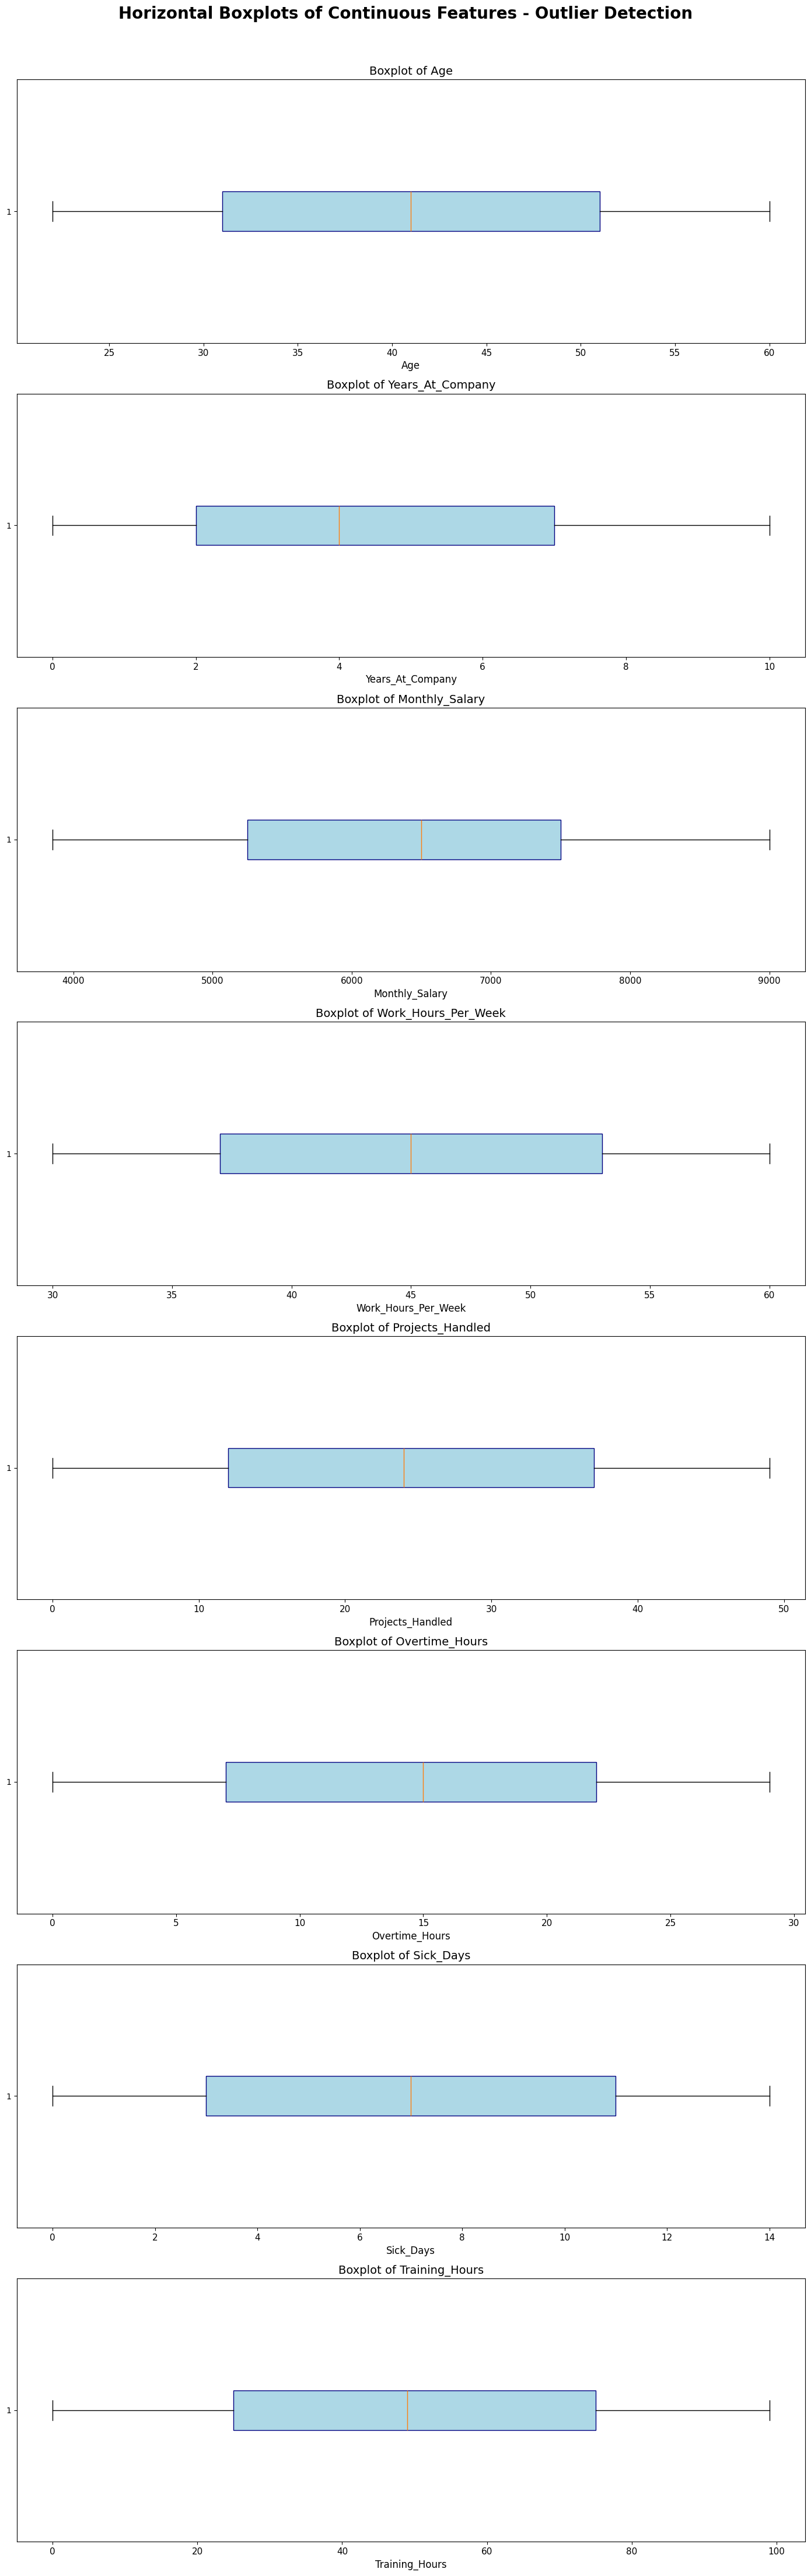

In [57]:
# ============================================================
# 📊 Horizontal Boxplots of Continuous Features - One per Row
# ============================================================

# Select key numeric columns
boxplot_cols = [
    "Age", "Years_At_Company", "Monthly_Salary", 
    "Work_Hours_Per_Week", "Projects_Handled", 
    "Overtime_Hours", "Sick_Days", "Training_Hours"
]

# Create subplots: 8 rows, 1 column
fig, axes = plt.subplots(len(boxplot_cols), 1, figsize=(14, 45))  

# Loop through each column
for i, col in enumerate(boxplot_cols):
    axes[i].boxplot(emp_base_data[col].dropna(), vert=False, patch_artist=True,
                    boxprops=dict(facecolor="lightblue", color="navy"))
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].tick_params(axis='x', labelsize=11)

plt.suptitle("Horizontal Boxplots of Continuous Features - Outlier Detection", fontsize=20, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.97])  # leave space for suptitle
plt.show()


Boxplots of continuous features did not reveal significant outliers, suggesting that the dataset is well-structured and bounded. This is consistent with the fact that many variables (e.g., Age, Years_At_Company, Work_Hours_Per_Week) have strict ranges. Therefore, no extreme values required removal or capping.

### Unique Values in Categorical Columns

In [58]:
cat_cols = emp_base_data.select_dtypes(include=["object"]).columns.tolist()
for col in cat_cols:
    print(f"{col}: {emp_base_data[col].nunique()} unique values → {emp_base_data[col].unique()[:10]}")


Department: 9 unique values → ['IT' 'Finance' 'Customer Support' 'Engineering' 'Marketing' 'HR'
 'Operations' 'Sales' 'Legal']
Gender: 3 unique values → ['Male' 'Female' 'Other']
Job_Title: 7 unique values → ['Specialist' 'Developer' 'Analyst' 'Manager' 'Technician' 'Engineer'
 'Consultant']
Hire_Date: 3650 unique values → [nan '2024-04-18 08:03:05.556036' '2016-10-22 08:03:05.556036'
 '2021-07-23 08:03:05.556036' '2016-08-14 08:03:05.556036'
 '2023-08-28 08:03:05.556036' '2014-10-27 08:03:05.556036'
 '2023-06-29 08:03:05.556036' '2016-12-23 08:03:05.556036'
 '2019-11-26 08:03:05.556036']
Education_Level: 4 unique values → ['High School' 'Bachelor' 'Master' 'PhD' nan]
Resigned: 2 unique values → [False True nan]


## Exploratory Data Analysis

#### Correlation Heatmap for Numeric Variables

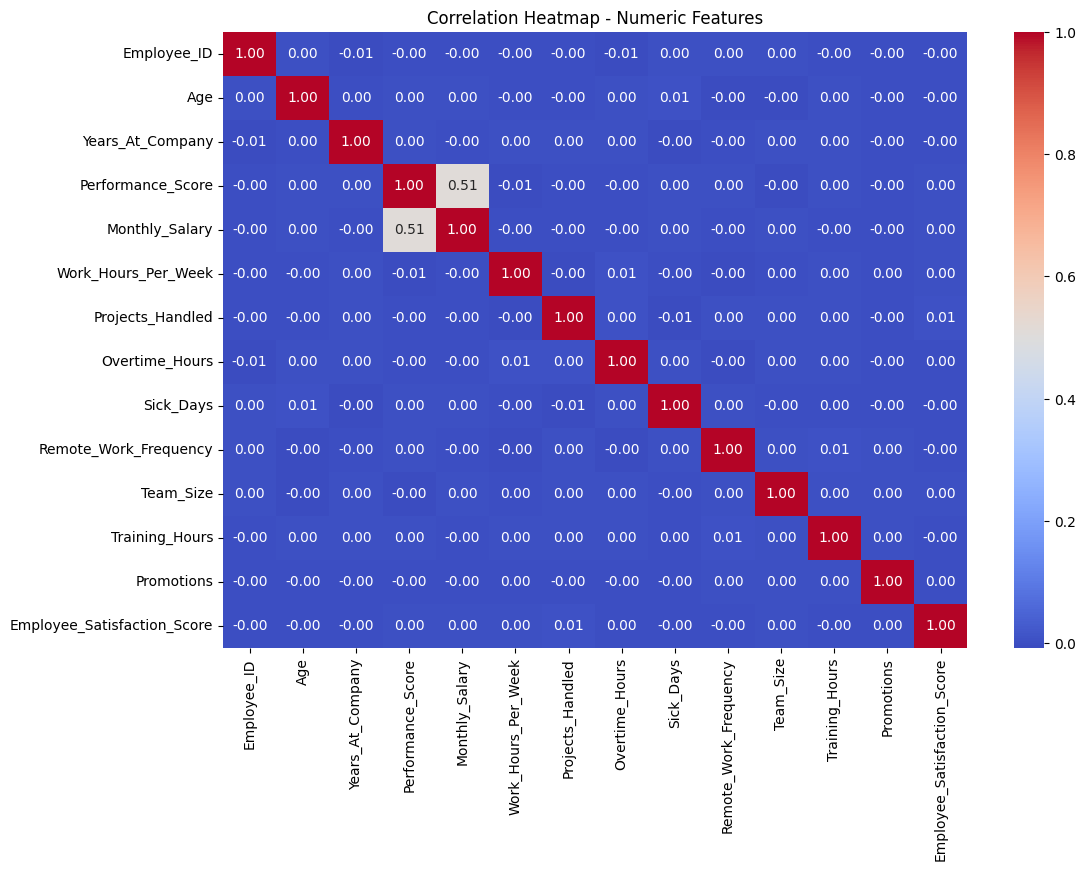

In [59]:

plt.figure(figsize=(12,8))
sns.heatmap(emp_base_data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - Numeric Features")
plt.show()

#### Distribution of Key Features

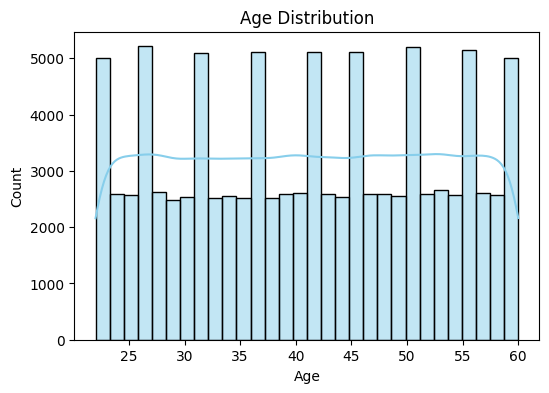

In [60]:
#Age distribution
plt.figure(figsize=(6,4))
sns.histplot(emp_base_data["Age"], bins=30, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.show()

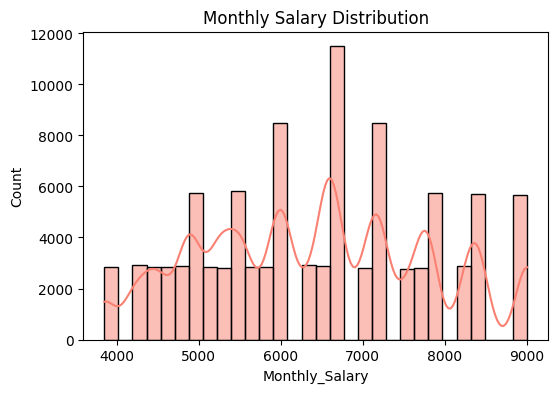

In [61]:
# Monthly Salary Distribution
plt.figure(figsize=(6,4))
sns.histplot(emp_base_data["Monthly_Salary"], bins=30, kde=True, color="salmon")
plt.title("Monthly Salary Distribution")
plt.show()

In [62]:
# Tenure Grouping 
bins = [0, 1, 2, 5, 10]
labels = ["<1 year", "1-2 years", "2-5 years", "5-10 years"]

emp_base_data["Years_At_Company_Group"] = pd.cut(
    emp_base_data["Years_At_Company"], bins=bins, labels=labels, right=False
)


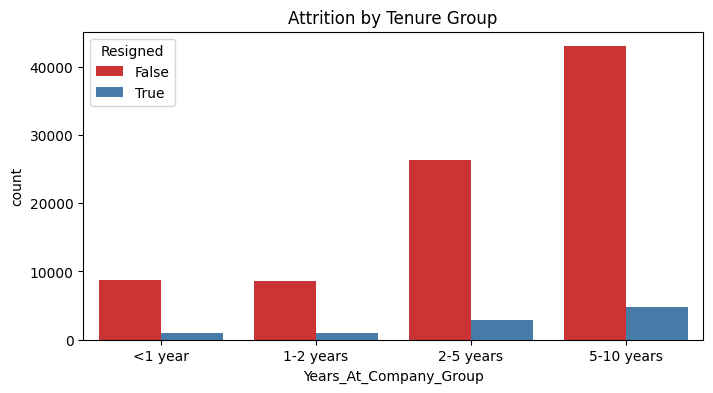

In [63]:
plt.figure(figsize=(8,4))
sns.countplot(x="Years_At_Company_Group", hue="Resigned", data=emp_base_data, palette="Set1")
plt.title("Attrition by Tenure Group")
plt.show()

 Employees with more than 2 years at the company show higher attrition rates.

#### Univariate Analysis

Compare each categorical variable (Gender, Department, Education_Level, Job_Title, etc.) with Resigned.

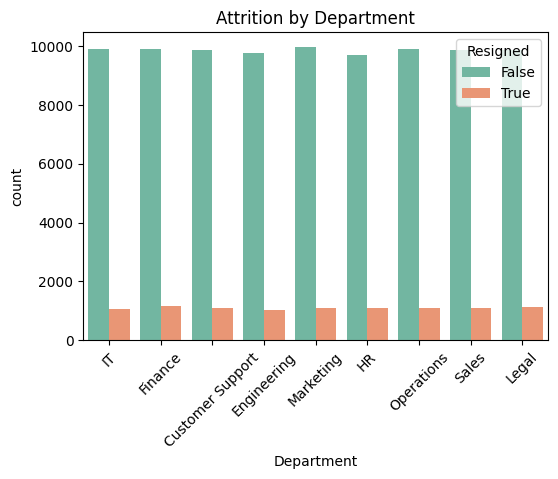

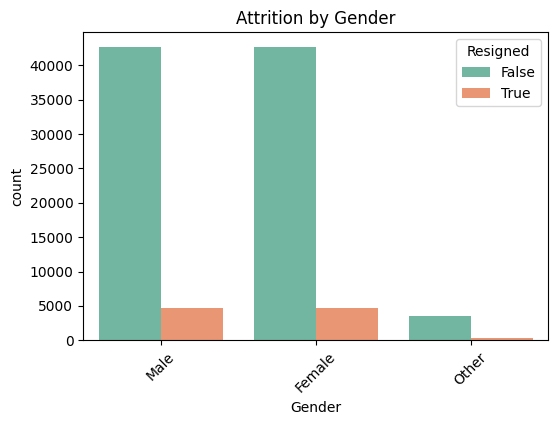

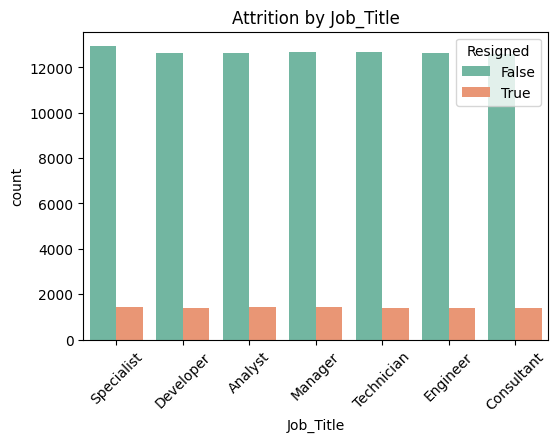

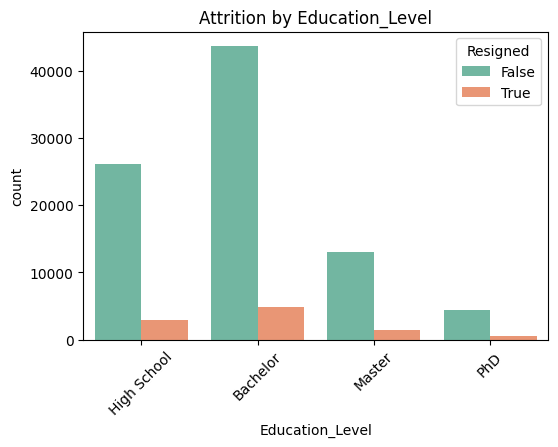

In [64]:
# Univariate analysis: categorical variables vs target
cat_features = ["Department", "Gender", "Job_Title", "Education_Level"]

for col in cat_features:
    plt.figure(figsize=(6,4))
    sns.countplot(data=emp_base_data, x=col, hue="Resigned", palette="Set2")
    plt.title(f"Attrition by {col}")
    plt.xticks(rotation=45)
    plt.show()

Distribution of numeric features split by Resigned.

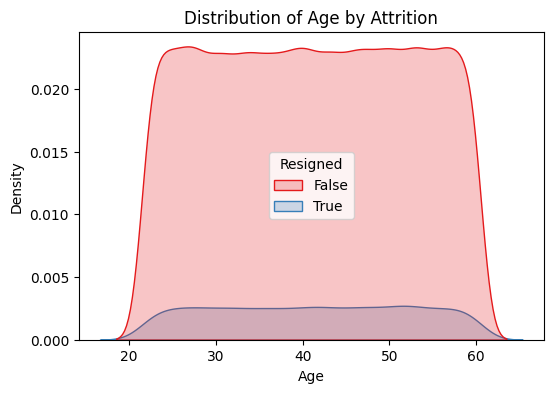

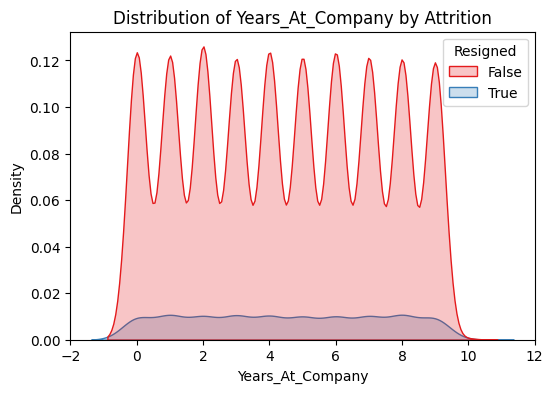

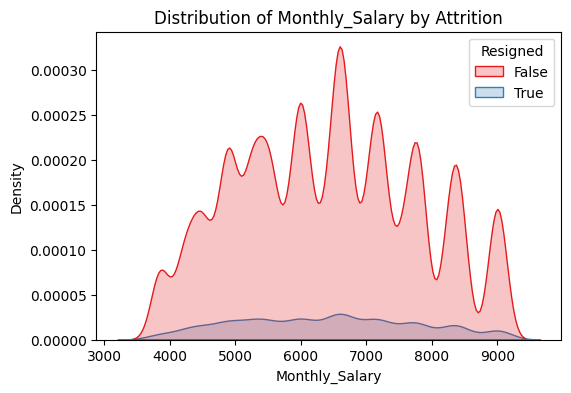

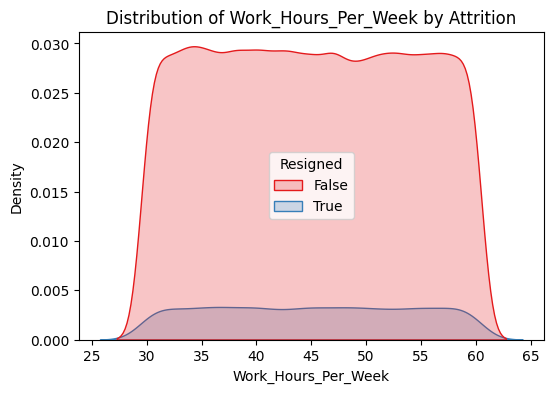

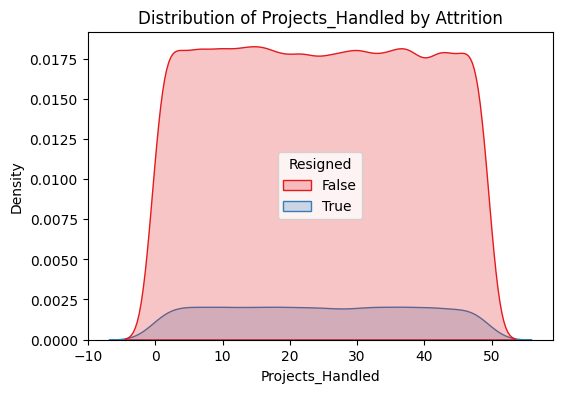

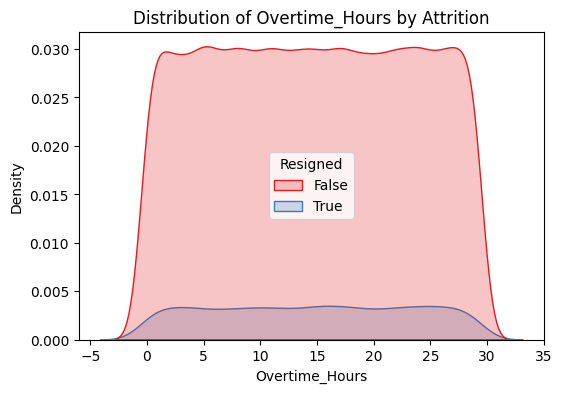

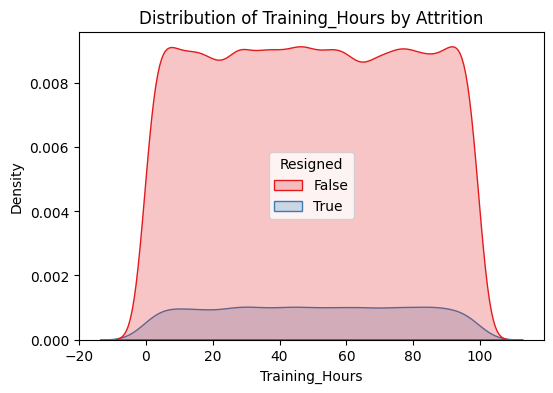

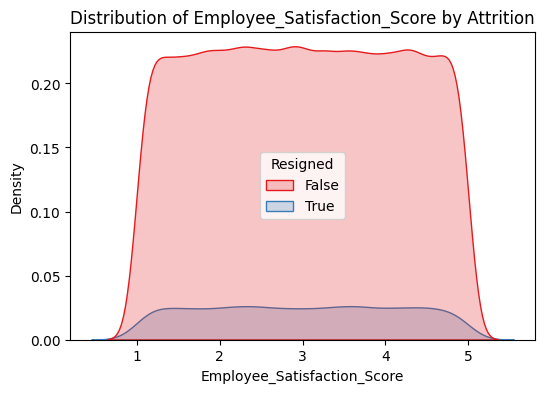

In [65]:
# Univariate Analysis of Numerical Features
num_features = ["Age", "Years_At_Company", "Monthly_Salary", 
                "Work_Hours_Per_Week", "Projects_Handled", 
                "Overtime_Hours", "Training_Hours", "Employee_Satisfaction_Score"]

for col in num_features:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=emp_base_data, x=col, hue="Resigned", fill=True, palette="Set1")
    plt.title(f"Distribution of {col} by Attrition")
    plt.show()


#### Pair Plots

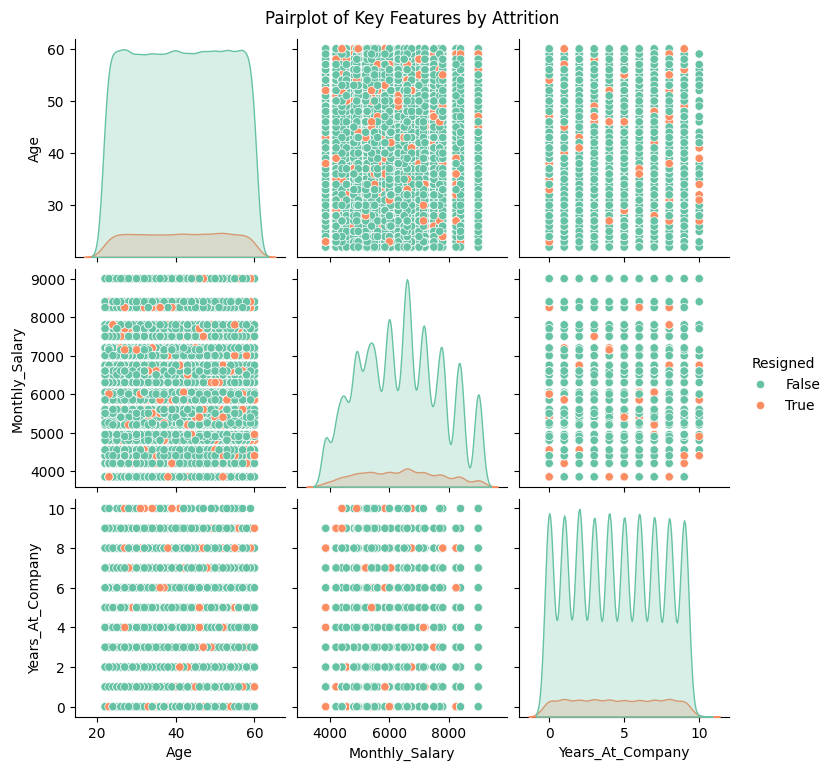

In [66]:
sns.pairplot(
    emp_base_data[["Age", "Monthly_Salary", "Years_At_Company", "Resigned"]],
    hue="Resigned", diag_kind="kde", palette="Set2"
)
plt.suptitle("Pairplot of Key Features by Attrition", y=1.02)
plt.show()


#### Bivariate Relationship

Scatter plot between Monthly_Salary and Years_At_Company colored by Resigned.

C:\Users\chary\OneDrive\Desktop\Employee_Attrition-_Prediction_Model\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


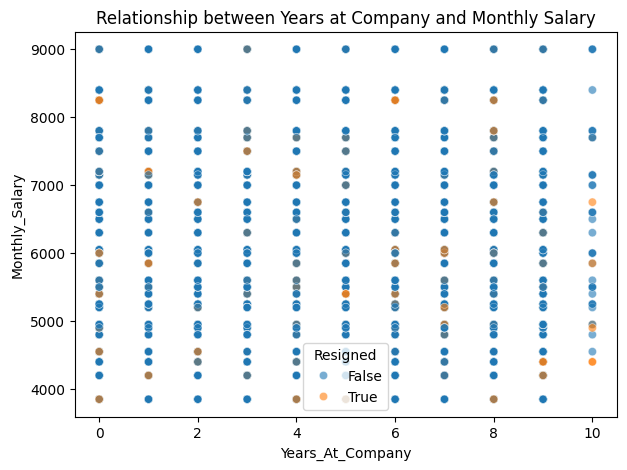

In [67]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=emp_base_data, x="Years_At_Company", y="Monthly_Salary", hue="Resigned", alpha=0.6)
plt.title("Relationship between Years at Company and Monthly Salary")
plt.show()


#### Bivariate Analysis - Categorical Predictors vs Resigned

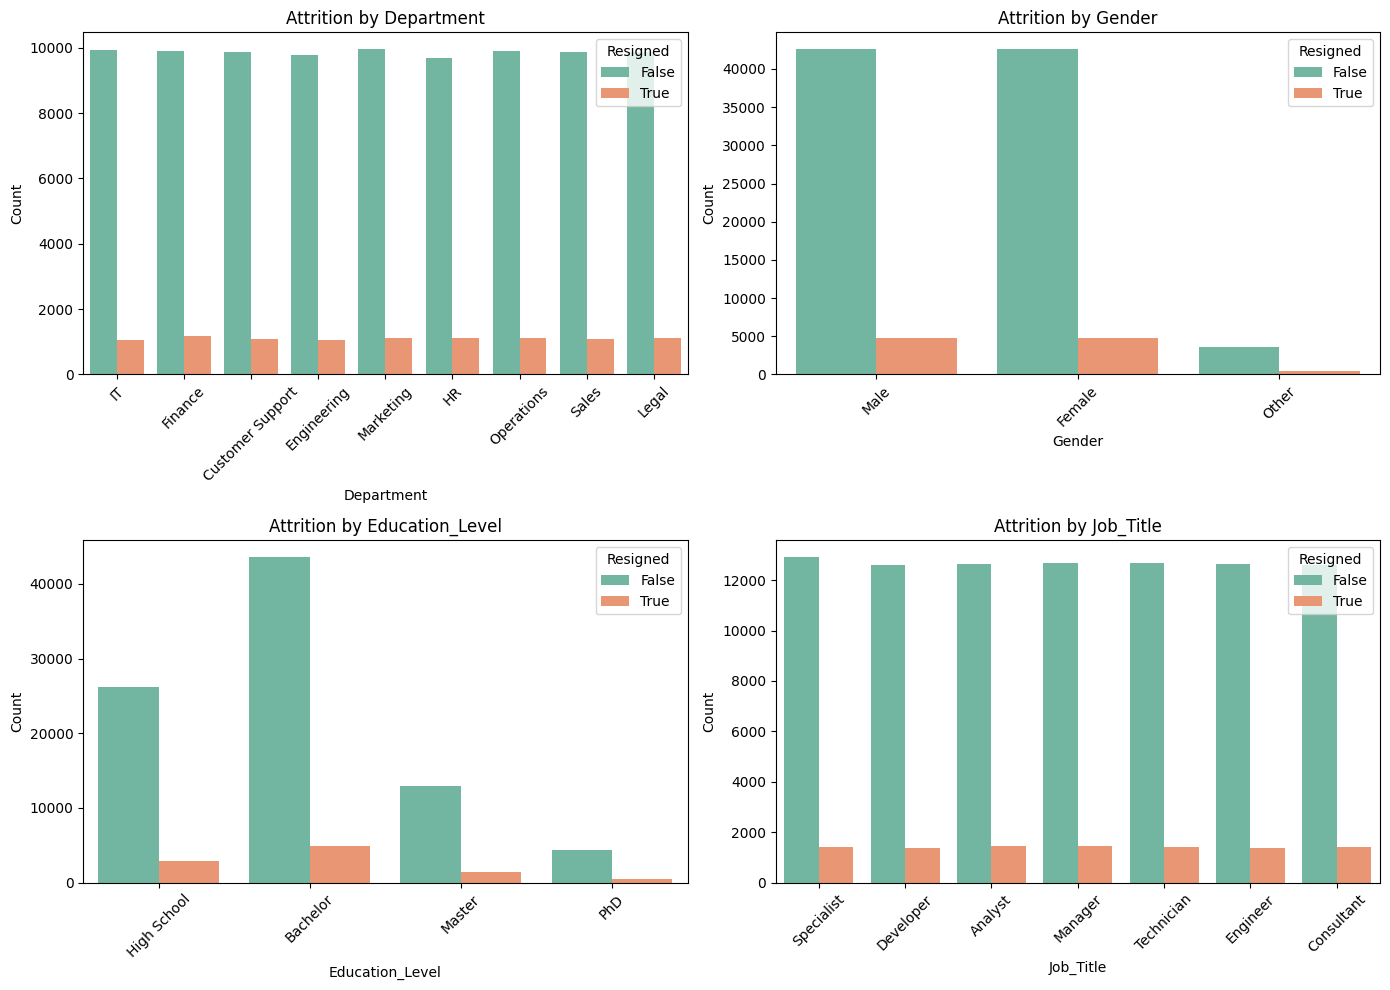

In [68]:
# Select key categorical predictors
cat_predictors = ["Department", "Gender", "Education_Level", "Job_Title"]

# Determine subplot layout
n_cols = 2
n_rows = len(cat_predictors) // n_cols + (len(cat_predictors) % n_cols > 0)

# Create subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 5))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through each categorical predictor
for i, predictor in enumerate(cat_predictors):
    sns.countplot(data=emp_base_data, x=predictor, hue="Resigned", ax=axes[i], palette="Set2")
    axes[i].set_title(f"Attrition by {predictor}", fontsize=12)
    axes[i].set_xlabel(predictor, fontsize=10)
    axes[i].set_ylabel("Count", fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### correlation bar chart

In [70]:
# Compute correlation with target
corr_with_target = emp_base_data.corr(numeric_only=True)["Resigned_flag"].drop("Resigned_flag")

plt.figure(figsize=(20,8))
corr_with_target.sort_values(ascending=False).plot(kind="bar", color="teal")

plt.title("Correlation of Features with Employee Attrition (Resigned)", fontsize=16)
plt.ylabel("Correlation with Resigned", fontsize=12)
plt.show()


KeyError: 'Resigned_flag'



The chart above shows the correlation of numeric features with the target variable **Resigned**.  
- Features are sorted from the highest positive correlation (increase in resignation likelihood) to the most negative correlation (more likely to stay).  
- We observe that:
  - **Remote_Work_Frequency** and **Age** show the strongest (though still weak) positive correlation with resignations.  
  - Features like **Employee_Satisfaction_Score** and **Performance_Score** are slightly negatively correlated, suggesting that higher satisfaction and performance reduce attrition risk.  
  - Other variables such as **Monthly_Salary**, **Team_Size**, and **Training_Hours** show very weak correlation individually.  



## Conclusion

From the exploratory data analysis (EDA), we can summarize the following key insights about **Employee Attrition**:

1. **Target Distribution (Resigned)**  
   - The dataset is imbalanced, with a larger proportion of employees staying compared to those who resigned.  
   - This indicates the need for techniques like **resampling** or **balanced evaluation metrics** (e.g., F1-score, ROC-AUC) when building predictive models.

2. **Outlier Detection**  
   - Boxplots showed no significant extreme outliers across numeric variables such as **Monthly Salary**, **Age**, and **Training Hours**.  
   - Most features follow expected ranges, meaning outlier handling has minimal effect here.

3. **Univariate Analysis**  
   - Employee demographics (e.g., **Gender**, **Department**, **Education Level**) show visible differences in resignation patterns.  
   - Certain departments and job roles may be more prone to higher attrition.  

5. **Satisfaction & Performance**  
   - **Employee Satisfaction Score** and **Performance Score** are negatively correlated with attrition.  
   - Lower satisfaction and performance appear to increase the risk of resignation.

6. **Correlation with Target**  
   - No single numeric feature shows very strong correlation with resignation (all correlations are weak).  
   - However, **Remote Work Frequency** and **Age** are slightly positively correlated with attrition, while **Satisfaction Score** and **Performance Score** are negatively correlated.  
   - This confirms that attrition is a **multi-factorial problem**, better captured using machine learning models than single-variable analysis.


